# Subtask 1

## Import 

In [1]:
# Only useful if you want to output the graph to the Python notebook
%matplotlib inline


import numpy  as np
import pandas as pd

# Import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt # Pyplot is such a general function that it deserves its own alias
from pandas.plotting import scatter_matrix

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

import warnings
warnings.simplefilter('ignore')

df = pd.read_csv("regression1.csv", header=None)

In [2]:
df.shape

(100, 2)

##  Visualization

Text(0, 0.5, '{Y}')

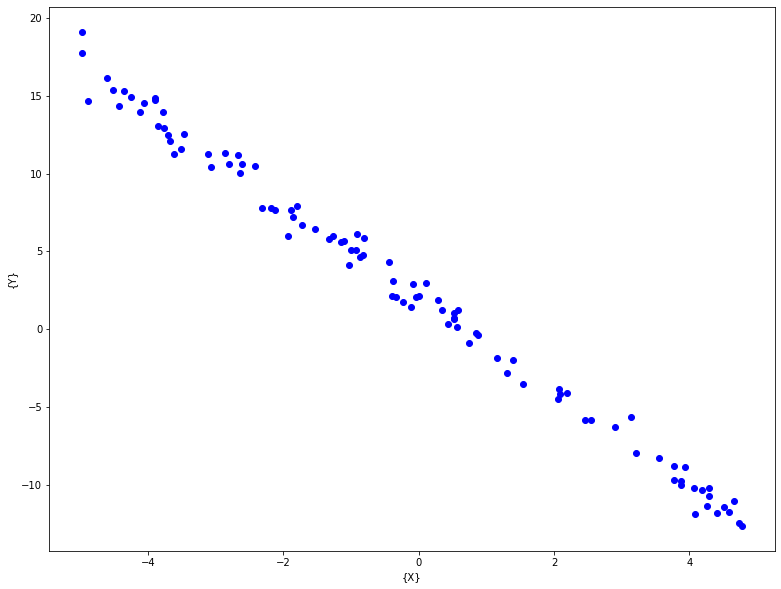

In [3]:
X = df[0].to_numpy().reshape(len(df[0]), 1)
y = df[1].to_numpy().reshape(len(df[1]), 1)
plt.figure(figsize=(13,10))
plt.plot(X, y, 'o', color='blue');
plt.xlabel("{X}")
plt.ylabel("{Y}")

## Linear Regression

In [4]:
model = LinearRegression(fit_intercept = True)
model.fit(X, y)
y_pred = model.predict(X)

In [5]:
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)
print("Mean Squared Error: %.2f " % mean_squared_error(y, y_pred))
print("Coefficient of Determination R^2 %.2f" % r2_score(y, y_pred))

Intercept: [2.01140361]
Slope: [[-2.99670177]]
Mean Squared Error: 0.57 
Coefficient of Determination R^2 0.99


## Plotting the regression Line

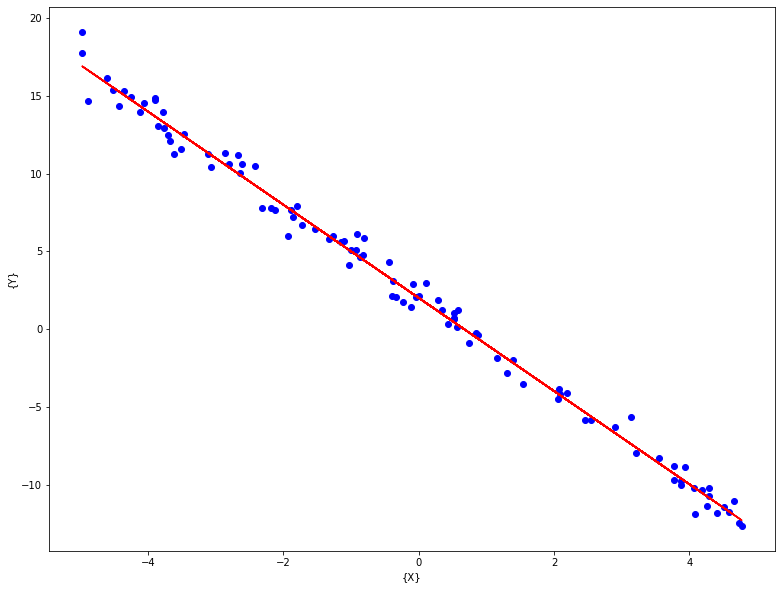

In [6]:
plt.figure(figsize=(13,10))
plt.plot(X, y, 'o', color='blue')
plt.xlabel("{X}")
plt.ylabel("{Y}")
plt.plot(X, y_pred, 'r-');

## Justification For Choices

* From the CW description the features are not given any names, and so, instead of using the 'name' parameter I used header=None to ensure that the first row did not become the column headers. 
* I then ran df.shape to ensure the df was 100x2, matching the CW description. 
* Next, I used plt.plot to visualize the data, providing insights into whether a linear model would be appropriate and if so, to what degree (estimate fit). 
* For the OLS task, first the data would need to be turned into a column vector (as required by the function/math), afterwhich I would then be able to fit the model with X (Explanatory) and y (response); generating a trained model and printing the β<sub>0</sub>, β<sub>1</sub>, MSE and Pearson's R.
* Finally I plotted the data once more with the fitted line on the same axes; again using plt.plot, visually afirming the Pearsons R strong negative correlation.

# Subtask 2

## Import & Visualization

In [7]:
df = pd.read_csv("regression2.csv", header=None)
df.shape

(500, 3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A8BCE3B88>,
      dtype=object)

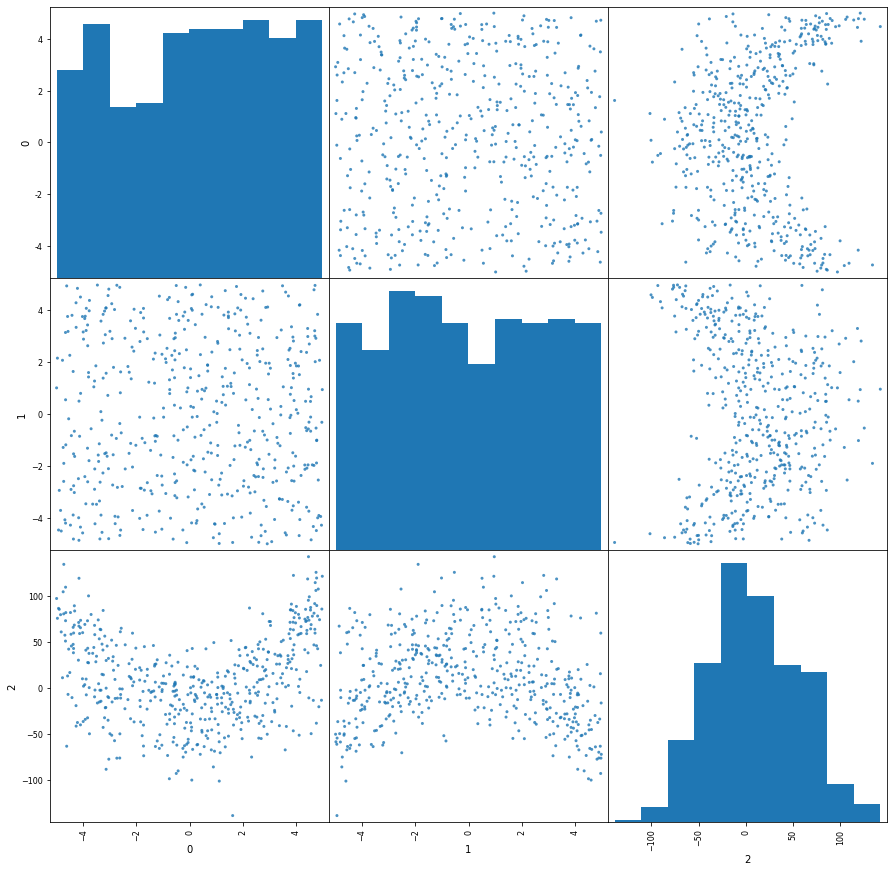

In [8]:
pd.plotting.scatter_matrix(df, alpha = 0.8, figsize=(15,15))

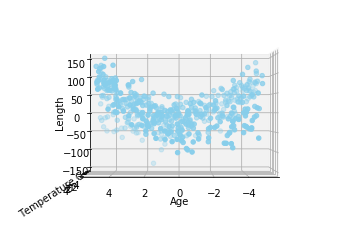

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[0], df[1], df[2], c='skyblue')
ax.set_xlabel("Age")
ax.set_ylabel("Temperature C")
ax.set_zlabel("Length")
ax.view_init(0, 90)
plt.show()

In [10]:
# Definitely not linear from visualization

## Hidden Layer Nodes Modifications

In [11]:
hid_res = pd.DataFrame(columns=["Hid_Lay_Nodes", "MSE", "MAE"])

In [12]:
X = df[[0, 1]]
y = df[2]

display_cnt = 0
for Hid_Lay_Nodes in range(1,250):
    regr = MLPRegressor(hidden_layer_sizes=(Hid_Lay_Nodes))
    model = regr.fit(X, y)
    y_pred = model.predict(X)

    hid_res = hid_res.append({
        "Hid_Lay_Nodes":  Hid_Lay_Nodes,
        "MSE": round(mean_squared_error(y, y_pred), 3),
        "MAE": round(mean_absolute_error(y, y_pred), 3),
    }, ignore_index=True)

    display_cnt +=1
    if (display_cnt % 10 == 0):
        print("Hidden neuron count: " , Hid_Lay_Nodes)

#default is 100
#hill climbed 0-1200 prior. Not much gained by excessive neuron count, can see curve flattening below.

Hidden neuron count:  10
Hidden neuron count:  20
Hidden neuron count:  30
Hidden neuron count:  40
Hidden neuron count:  50
Hidden neuron count:  60
Hidden neuron count:  70
Hidden neuron count:  80
Hidden neuron count:  90
Hidden neuron count:  100
Hidden neuron count:  110
Hidden neuron count:  120
Hidden neuron count:  130
Hidden neuron count:  140
Hidden neuron count:  150
Hidden neuron count:  160
Hidden neuron count:  170
Hidden neuron count:  180
Hidden neuron count:  190
Hidden neuron count:  200
Hidden neuron count:  210
Hidden neuron count:  220
Hidden neuron count:  230
Hidden neuron count:  240


## Full Data Error

**Used MAE too check that extreme variables weren't getting as heavily considered by the squaring, as I could see from  the visualizations though this didn't seem to be the case.**

In [13]:
hid_res.describe()

,Hid_Lay_Nodes,MSE,MAE
count,249.000000,249.000000,249.000000
mean,125.000000,923.684823,23.865205
std,72.024301,384.812171,4.636020
min,1.000000,660.317000,20.342000
25%,63.000000,673.310000,20.574000
50%,125.000000,724.718000,21.458000
75%,187.000000,1026.900000,25.680000
max,249.000000,2300.943000,38.338000


Text(0, 0.5, 'Error [MSE]')

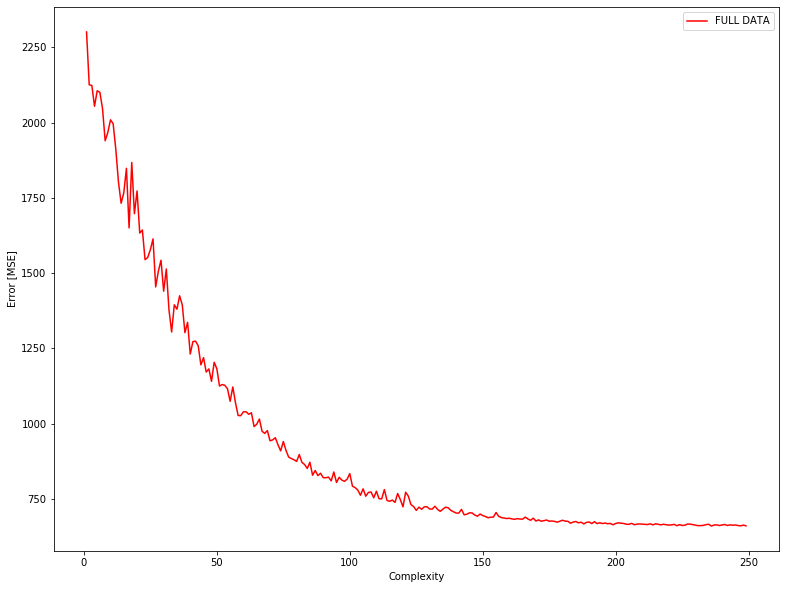

In [14]:
complexity = hid_res["Hid_Lay_Nodes"]
error = hid_res["MSE"]


plt.figure(figsize=(13,10))
plt.plot(complexity, error, color='red', label="FULL DATA")
plt.legend()
plt.xlabel("Complexity")
plt.ylabel("Error [MSE]")

* If a MLPRegression Model with only this parameter modified was to be the choice without a test/split, hidden nodes about **125**
* Visualizing this data through a (complexity x error) plot clearly shows when the amount of nodes stop becoming efficient as loss erratically increases and decreases (modelling noise)

## Training Testing Split

In [15]:
s_hid_res = pd.DataFrame(columns=["Hid_Lay_Nodes", "Train_MSE", "Test_MSE", "Train_MAE", "Test_MAE", "Train_Er", "Test_Er"])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

display_cnt = 0
for Hid_Lay_Nodes in range(1,500):
    s_regr = MLPRegressor(hidden_layer_sizes=(Hid_Lay_Nodes))
    s_model = s_regr.fit(X_train, y_train)
    train_pred = s_model.predict(X_train)
    test_pred = s_model.predict(X_test)

    s_hid_res = s_hid_res.append({
        "Hid_Lay_Nodes":  Hid_Lay_Nodes,
        "Train_MSE": round(mean_squared_error(y_train, train_pred), 3),
        "Test_MSE": round(mean_squared_error(y_test, test_pred), 3),
        "Train_MAE": round(mean_absolute_error(y_train, train_pred), 3),
        "Test_MAE": round(mean_absolute_error(y_test, test_pred), 3),
        "Train_Er": s_model.score(X_train, y_train),
        "Test_Er": s_model.score(X_test, y_test),
    }, ignore_index=True)

    display_cnt +=1
    if (display_cnt % 10 == 0):
        print("Hidden neuron count: " , Hid_Lay_Nodes)

Hidden neuron count:  10
Hidden neuron count:  20
Hidden neuron count:  30
Hidden neuron count:  40
Hidden neuron count:  50
Hidden neuron count:  60
Hidden neuron count:  70
Hidden neuron count:  80
Hidden neuron count:  90
Hidden neuron count:  100
Hidden neuron count:  110
Hidden neuron count:  120
Hidden neuron count:  130
Hidden neuron count:  140
Hidden neuron count:  150
Hidden neuron count:  160
Hidden neuron count:  170
Hidden neuron count:  180
Hidden neuron count:  190
Hidden neuron count:  200
Hidden neuron count:  210
Hidden neuron count:  220
Hidden neuron count:  230
Hidden neuron count:  240
Hidden neuron count:  250
Hidden neuron count:  260
Hidden neuron count:  270
Hidden neuron count:  280
Hidden neuron count:  290
Hidden neuron count:  300
Hidden neuron count:  310
Hidden neuron count:  320
Hidden neuron count:  330
Hidden neuron count:  340
Hidden neuron count:  350
Hidden neuron count:  360
Hidden neuron count:  370
Hidden neuron count:  380
Hidden neuron count: 

Text(0, 0.5, 'Error [MSE]')

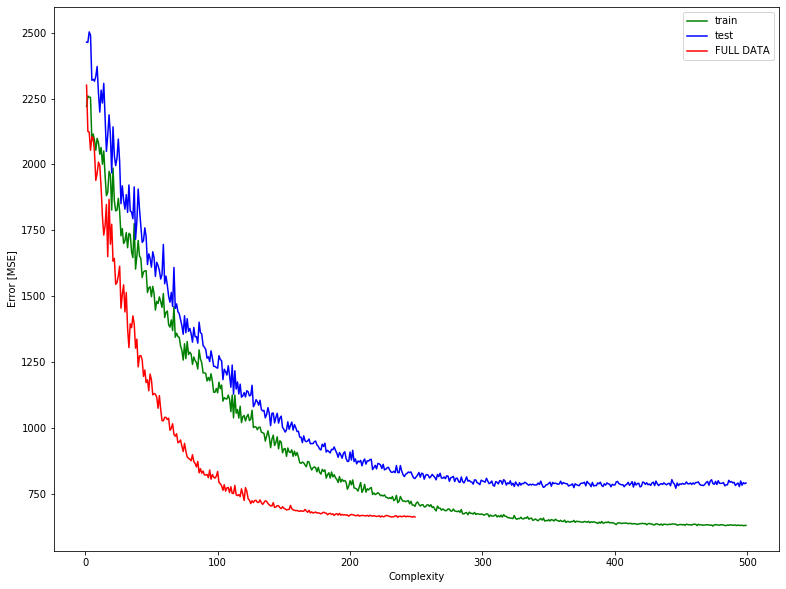

In [16]:
s_complexity = s_hid_res["Hid_Lay_Nodes"]
train_error = s_hid_res["Train_MSE"]
test_error = s_hid_res["Test_MSE"]

plt.figure(figsize=(13,10))
plt.plot(s_complexity, train_error, color='g', label="train")
plt.plot(s_complexity, test_error, color='b', label="test")
plt.plot(complexity, error, color='red', label="FULL DATA")
plt.legend()
plt.xlabel("Complexity")
plt.ylabel("Error [MSE]")

Text(0.5, 1.0, 'Performace Under Varying N.o Nodes')

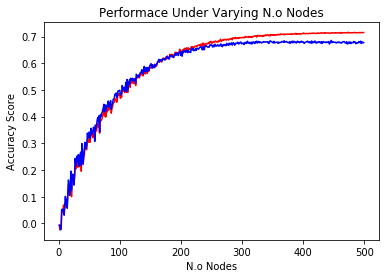

In [17]:
plt.plot(s_complexity, s_hid_res["Train_Er"], color='red',label='Training Accuracy')
plt.plot(s_complexity,s_hid_res["Test_Er"], color='blue',label='Testing Accuracy')
plt.xlabel('N.o Nodes')
plt.ylabel('Accuracy Score')
plt.title('Performace Under Varying N.o Nodes')    

## Justification For Choices & Evaluation of Model

* If a MLPRegression Model with modified hidden nodes and a training/test split, hidden nodes about **220** would be the most optimal. (especially as error starts to increase frequently after this point, indicating that the model could be modelling the noise/overfitting.
* Training and testing also become parallel and then slightly diverge at the point, as seen through error and score plots
* Visualizing this data through a (complexity x error) plot clearly shows when the amount of nodes stop becoming efficient.

## Additional Modifications

* This is only a modification of a single hyperparam, I'd like to do a bit more tweeking to see if any gains can be made; less complex or minimisng generalization error.

### Activation

In [20]:
regr = MLPRegressor(hidden_layer_sizes=150, activation='identity')  #‘identity’, ‘logistic’, ‘tanh’, ‘relu’
model = regr.fit(X, y)
y_pred = model.predict(X)
print("MSE", round(mean_squared_error(y, y_pred), 3) )
print("MAE", round(mean_absolute_error(y, y_pred), 3) )

#No Meaningful Improvements or worse

MSE 2223.383
MAE 38.118


### Alpha

In [21]:
for alph in range(1, 10):
    regr = MLPRegressor(hidden_layer_sizes=150, alpha=(alph/10000))  
    model = regr.fit(X, y)
    y_pred = model.predict(X)
    print("L2 Regularization ", alph/10000)
    print("MSE", round(mean_squared_error(y, y_pred), 3) )
    print("MAE", round(mean_absolute_error(y, y_pred), 3) )
    
#no meaningful impact

L2 Regularization  0.0001
MSE 695.393
MAE 20.937
L2 Regularization  0.0002
MSE 687.29
MAE 20.823
L2 Regularization  0.0003
MSE 701.014
MAE 21.037
L2 Regularization  0.0004
MSE 692.897
MAE 20.957
L2 Regularization  0.0005
MSE 687.647
MAE 20.793
L2 Regularization  0.0006
MSE 713.265
MAE 21.231
L2 Regularization  0.0007
MSE 695.489
MAE 20.973
L2 Regularization  0.0008
MSE 695.492
MAE 20.985
L2 Regularization  0.0009
MSE 692.732
MAE 20.969


### Solver

In [22]:
regr = MLPRegressor(hidden_layer_sizes=150, solver='lbfgs')  
model = regr.fit(X, y)
y_pred = model.predict(X)
print("lbfgs")
print("MSE", round(mean_squared_error(y, y_pred), 3) )
print("MAE", round(mean_absolute_error(y, y_pred), 3) )

regr = MLPRegressor(hidden_layer_sizes=150, solver='sgd')  
model = regr.fit(X, y)
y_pred = model.predict(X)
print("sgd")
print("MSE", round(mean_squared_error(y, y_pred), 3) )
print("MAE", round(mean_absolute_error(y, y_pred), 3) )

#both perform better

lbfgs
MSE 475.03
MAE 17.493
sgd
MSE 603.132
MAE 19.597


### Compare Solvers

In [23]:
solhi_res = pd.DataFrame(columns=["Hid_Lay_Nodes", "MSE", "MAE"])

In [24]:
display_cnt = 0
for Hid_Lay_Nodes in range(1,250):
    regr = MLPRegressor(hidden_layer_sizes=(Hid_Lay_Nodes), solver='lbfgs')
    model = regr.fit(X, y)
    y_pred = model.predict(X)

    solhi_res = solhi_res.append({
        "Hid_Lay_Nodes":  Hid_Lay_Nodes,
        "MSE": round(mean_squared_error(y, y_pred), 3),
        "MAE": round(mean_absolute_error(y, y_pred), 3),
    }, ignore_index=True)

    display_cnt +=1
    if (display_cnt % 10 == 0):
        print("Hidden neuron count: " , Hid_Lay_Nodes)

Hidden neuron count:  10
Hidden neuron count:  20
Hidden neuron count:  30
Hidden neuron count:  40
Hidden neuron count:  50
Hidden neuron count:  60
Hidden neuron count:  70
Hidden neuron count:  80
Hidden neuron count:  90
Hidden neuron count:  100
Hidden neuron count:  110
Hidden neuron count:  120
Hidden neuron count:  130
Hidden neuron count:  140
Hidden neuron count:  150
Hidden neuron count:  160
Hidden neuron count:  170
Hidden neuron count:  180
Hidden neuron count:  190
Hidden neuron count:  200
Hidden neuron count:  210
Hidden neuron count:  220
Hidden neuron count:  230
Hidden neuron count:  240


Text(0, 0.5, 'Error [MSE]')

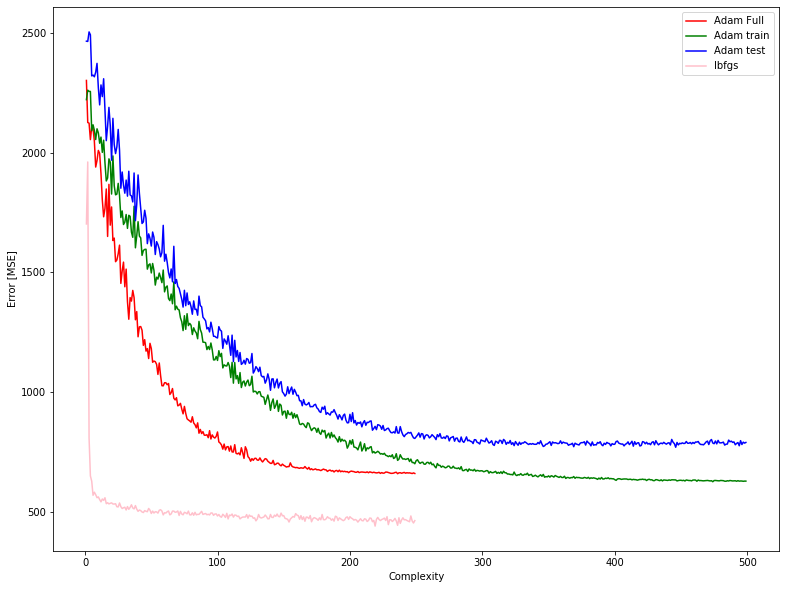

In [25]:
complexity = hid_res["Hid_Lay_Nodes"]
error = hid_res["MSE"]
complsol = solhi_res["Hid_Lay_Nodes"]
errorsol = solhi_res["MSE"]

plt.figure(figsize=(13,10))

plt.plot(complexity, error, color='red', label="Adam Full")
plt.plot(s_complexity, train_error, color='g', label="Adam train")
plt.plot(s_complexity, test_error, color='b', label="Adam test")
plt.plot(complsol, errorsol, color='pink', label="lbfgs")
plt.legend()
plt.xlabel("Complexity")
plt.ylabel("Error [MSE]")

In [26]:
solhi_res.loc[(solhi_res["Hid_Lay_Nodes"] <15)]

,Hid_Lay_Nodes,MSE,MAE
0,1.0,1702.242,32.530
1,2.0,1960.815,34.930
2,3.0,809.592,22.259
3,4.0,651.301,20.273
4,5.0,628.974,20.016
5,6.0,570.293,18.925
6,7.0,583.038,19.283
7,8.0,572.742,19.097
8,9.0,560.283,18.828
9,10.0,563.403,18.836


## Comments

* The lbfsg solver is way more effective as a hyperparam modification as it is less complex and more accurate than previous changes.
* Hits local/global optima very quickly
* could cut the model off at 6, very cheap model.